
## Step 1 - Data Prep with Quantmod 

### Purpose:

1. Download daily stock prices for Tesla over the past three years

2. Download Call and Put option prices

3. Calculate the T-Bill Rate

---

In [2]:
suppressMessages(library('dplyr'))
suppressMessages(library('quantmod'))
suppressMessages(library('repr'))
suppressMessages(library('xlsx'))
# What other packages do we need? Please don't call install.packages() here!

In [3]:
# This is a setting to change the size of plotting.
options(repr.plot.width = 5.5, repr.plot.height =4)

In [4]:
tics <- c("TSLA")
download_tic <- function(x) get(getSymbols(x, from = '2018-01-01', to = '2021-11-04' ))[,6]
TSLA <- function(x) get(getSymbols(x, from = '2018-01-01', to = '2021-09-01' ))
TSLA_df = lapply(tics, TSLA)

p_list <- lapply(tics, download_tic)

‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



In [5]:
# Write this to excel.. 
# 
TSLA_df[[1]][1:5,]

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2018-01-02    62.400    64.422   62.200     64.106    21761000        64.106
2018-01-03    64.200    65.050   63.110     63.450    22607500        63.450
2018-01-04    62.574    63.710   61.136     62.924    49731500        62.924
2018-01-05    63.324    63.448   62.400     63.316    22956000        63.316
2018-01-08    63.200    67.404   63.100     67.282    49297000        67.282

In [6]:
#Teslaoption = getOptionChain("TSLA",src = "yahoo", "2020/2021")
#Teslaoption

In [7]:
#Teslaoption$Nov.05.2021$calls

In [8]:
AdjustedClosePrice <- Reduce(merge,p_list)
AdjustedClosePrice[1:5]

           TSLA.Adjusted
2018-01-02        64.106
2018-01-03        63.450
2018-01-04        62.924
2018-01-05        63.316
2018-01-08        67.282

In [16]:
colnames(AdjustedClosePrice) <- c("TESLA")
AdjustedClosePrice[1:5]
tail(AdjustedClosePrice)

            TESLA
2018-01-02 64.106
2018-01-03 63.450
2018-01-04 62.924
2018-01-05 63.316
2018-01-08 67.282

             TESLA
2021-10-27 1037.86
2021-10-28 1077.04
2021-10-29 1114.00
2021-11-01 1208.59
2021-11-02 1172.00
2021-11-03 1213.86

In [10]:
dailylogreturn <- na.omit(log(AdjustedClosePrice/lag(AdjustedClosePrice)))
dailylogreturn[1:5]

                  TESLA
2018-01-03 -0.010285800
2018-01-04 -0.008324561
2018-01-05  0.006210444
2018-01-08  0.060754619
2018-01-09 -0.008118221

In [11]:
colnames(dailylogreturn) <- c("TESLA")
dailylogreturn[1:5]

                  TESLA
2018-01-03 -0.010285800
2018-01-04 -0.008324561
2018-01-05  0.006210444
2018-01-08  0.060754619
2018-01-09 -0.008118221

In [12]:
head(dailylogreturn)
tail(dailylogreturn)

                  TESLA
2018-01-03 -0.010285800
2018-01-04 -0.008324561
2018-01-05  0.006210444
2018-01-08  0.060754619
2018-01-09 -0.008118221
2018-01-10  0.003320920

                 TESLA
2021-10-27  0.01889867
2021-10-28  0.03705569
2021-10-29  0.03374057
2021-11-01  0.08149722
2021-11-02 -0.03074267
2021-11-03  0.03509366

In [13]:
Annualmeanreturn <- mean(dailylogreturn$TESLA)*252
Annualmeanreturn

[1] 0.7664299

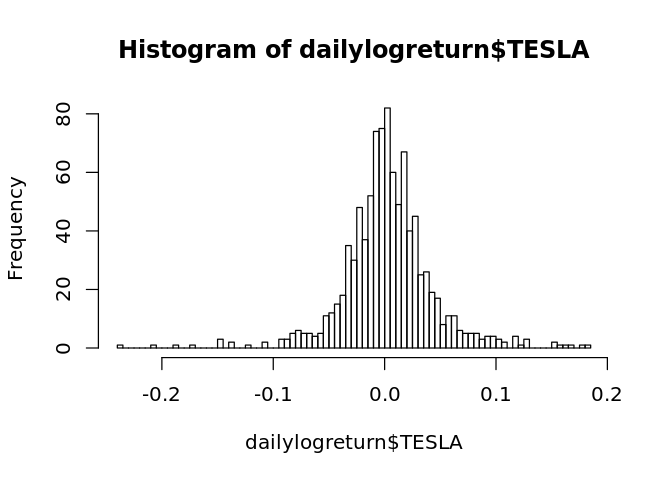

In [14]:
hist(dailylogreturn$TESLA, breaks = 70)

In [15]:
AnnualVolreturn <- sd(dailylogreturn$TESLA)*sqrt(252)
AnnualVolreturn 

[1] 0.6494608

In [15]:
SR <- Annualmeanreturn/AnnualVolreturn
SR

[1] 1.180102

---
### T Bill

In [16]:
#Tbill<- suppressMessages(getSymbols("^IRX", from= "2018-01-01", to= "2021-09-01", auto.assign = F))
Tbill<- suppressMessages(getSymbols("^IRX", from= "2021-10-01", to= "2021-11-04", auto.assign = F))
Tbill<- na.omit(Tbill) 

Warning message:
“^IRX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

In [17]:
Tbill<-Tbill[,6]
Tbill

           IRX.Adjusted
2021-10-01        0.028
2021-10-04        0.028
2021-10-05        0.035
2021-10-06        0.040
2021-10-07        0.040
2021-10-08        0.040
2021-10-11        0.040
2021-10-12        0.040
2021-10-13        0.045
2021-10-14        0.040
2021-10-15        0.038
2021-10-18        0.043
2021-10-19        0.050
2021-10-20        0.050
2021-10-21        0.050
2021-10-22        0.050
2021-10-25        0.050
2021-10-26        0.050
2021-10-27        0.050
2021-10-28        0.048
2021-10-29        0.048
2021-11-01        0.040
2021-11-02        0.045
2021-11-03        0.045

In [18]:
tail(Tbill)
Tbillreturn<- na.omit(log(Tbill$IRX.Adjusted/lag(Tbill$IRX.Adjusted)))

           IRX.Adjusted
2021-10-27        0.050
2021-10-28        0.048
2021-10-29        0.048
2021-11-01        0.040
2021-11-02        0.045
2021-11-03        0.045

In [19]:
head(Tbillreturn)
Tbillannualmeanreturn<- mean(Tbillreturn$IRX.Adjusted)*252

           IRX.Adjusted
2021-10-04    0.0000000
2021-10-05    0.2231436
2021-10-06    0.1335314
2021-10-07    0.0000000
2021-10-08    0.0000000
2021-10-11    0.0000000

In [1]:
Tbillannualmeanreturn
Tbillvolreturn<- sd(Tbillreturn$IRX.Adjusted)*sqrt(252)

ERROR: Error in eval(expr, envir, enclos): object 'Tbillannualmeanreturn' not found


In [21]:
Tbillvolreturn
sharpeTbill<- Tbillannualmeanreturn/Tbillvolreturn

[1] 1.415906

[1] 3.671437

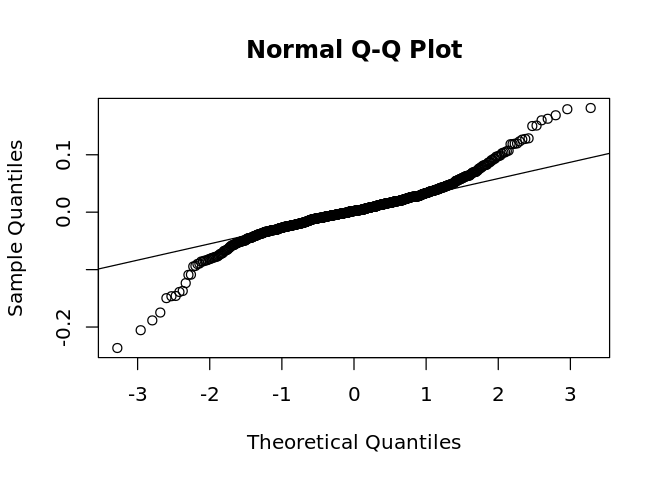

In [22]:
sharpeTbill
qqnorm(dailylogreturn$TESLA)
qqline(dailylogreturn$TESLA)

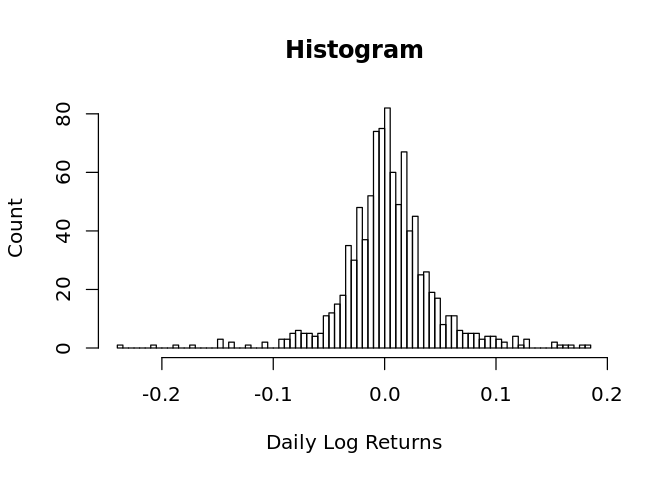

In [23]:
hist(dailylogreturn$TESLA, breaks = 75, main = "Histogram", xlab = "Daily Log Returns", ylab = 'Count')

In [24]:
log_returns = c(data.matrix(as.data.frame(dailylogreturn$TESLA)))

In [25]:
shapiro.test(log_returns)


	Shapiro-Wilk normality test

data:  log_returns
W = 0.92892, p-value < 2.2e-16


### Shapiro-Wilk Test

[Penn State - Test for Normality](https://online.stat.psu.edu/stat462/node/147/)


$$H_{0} = \text{The errors follow a normal distribution}$$

$$H_{a} = \text{ The errors do not follow a normal distribution. } $$

- When p-value < Alpha (.05) then we reject the null and accept the alternative. 

- Here p = . 000000000000000022

- Since p < .05, we acccpt the alternative. 

> *The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed.*

#### *Is this deeply concerning*   ?

---
# Conclusions

- Risk-Free Rate = 

- Volatility = 

- Dividend Rate = 


---
## Side Quest

### What's the relationship between Relative Returns and Log Returns? 


$$\text{Log Returns} = \log\Big(\frac{R_{i}}{R_{i-1}}\Big)$$


$$\text{Relative Returns} = \Big(\frac{R_{i} - R_{i-1}}{R_{i-1}}\Big)$$

In [26]:
suppressMessages(tics <- c("TSLA"))
download_tic <- function(x) get(getSymbols(x, from = '2018-01-01', to = '2021-09-01' ))

TSLA <- suppressMessages(lapply(tics, download_tic))

In [27]:

TSLA[[1]][1:5]

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2018-01-02    62.400    64.422   62.200     64.106    21761000        64.106
2018-01-03    64.200    65.050   63.110     63.450    22607500        63.450
2018-01-04    62.574    63.710   61.136     62.924    49731500        62.924
2018-01-05    63.324    63.448   62.400     63.316    22956000        63.316
2018-01-08    63.200    67.404   63.100     67.282    49297000        67.282

In [28]:
TSLA = data.frame(TSLA[[1]])

In [29]:
colnames(TSLA)

[1] "TSLA.Open"     "TSLA.High"     "TSLA.Low"      "TSLA.Close"   
[5] "TSLA.Volume"   "TSLA.Adjusted"

In [30]:
head(TSLA)

,TSLA.Open,TSLA.High,TSLA.Low,TSLA.Close,TSLA.Volume,TSLA.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2018-01-02,62.400,64.422,62.200,64.106,21761000,64.106
2018-01-03,64.200,65.050,63.110,63.450,22607500,63.450
2018-01-04,62.574,63.710,61.136,62.924,49731500,62.924
2018-01-05,63.324,63.448,62.400,63.316,22956000,63.316
2018-01-08,63.200,67.404,63.100,67.282,49297000,67.282
2018-01-09,67.032,67.760,65.480,66.738,35733000,66.738


In [31]:
rows = nrow(TSLA)
print(rows)

[1] 923


In [32]:
TSLA$TSLA.Close[1]

[1] 64.106

In [33]:
daily_returns = NULL 

for(i in 1:rows){
    daily_returns[i] = ((TSLA$TSLA.Close[i] - TSLA$TSLA.Open[i]) / TSLA$TSLA.Open[i])
} 

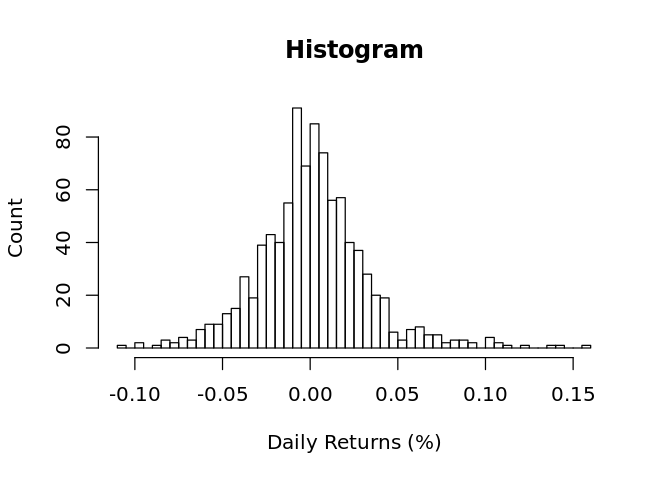

In [34]:
hist(daily_returns, main = "Histogram", xlab = "Daily Returns (%)", ylab= 'Count', breaks = 75)

In [35]:
log_returns = NULL 

for(i in 1:rows){
    log_returns[i] =  log(((TSLA$TSLA.Close[i] / TSLA$TSLA.Open[i])))
} 

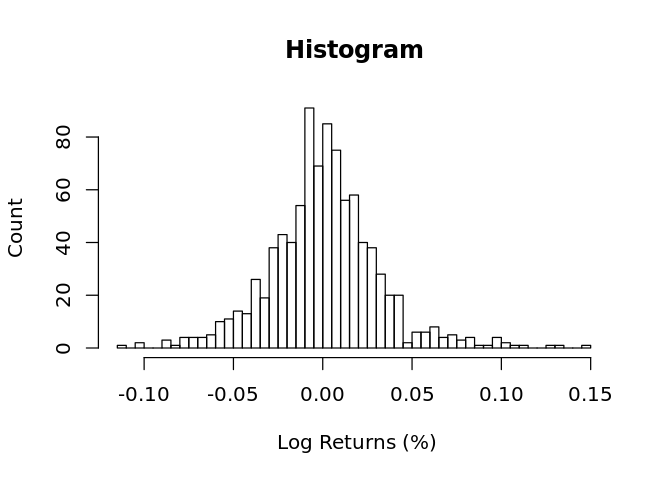

In [36]:
hist(log_returns, main = "Histogram", xlab = " Log Returns (%)", ylab= 'Count', breaks = 75)

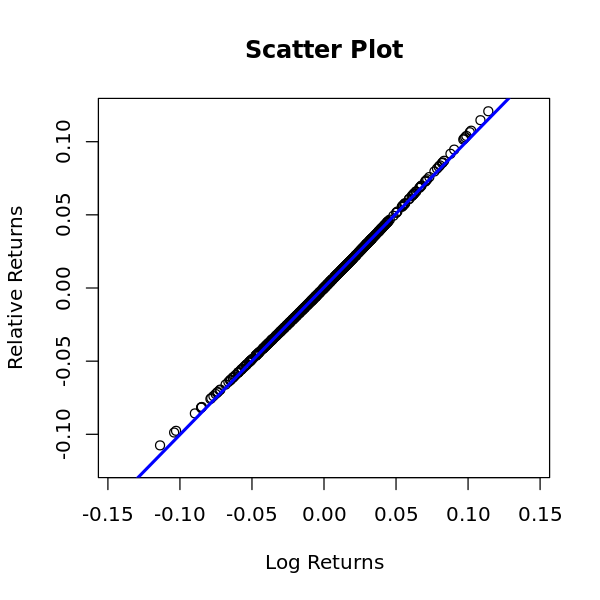

In [37]:
options(repr.plot.width = 5, repr.plot.height =5)
#png(filename="Daily_Returns_Scatter_Plot.png")

lm.out = lm(daily_returns~log_returns)


plot(daily_returns~ log_returns, type = 'p', xlab = 'Log Returns', ylab = 'Relative Returns', main = 'Scatter Plot',
    xlim = c(-.145, .145), ylim =c(-.12, .12))

abline(lm.out, col = 'blue', lwd =2.5)


In [38]:
summary(lm.out)


Call:
lm(formula = daily_returns ~ log_returns)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0005019 -0.0004717 -0.0003630  0.0000125  0.0097524 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.762e-04  3.209e-05   14.84   <2e-16 ***
log_returns 1.007e+00  1.035e-03  972.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0009745 on 921 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 9.463e+05 on 1 and 921 DF,  p-value: < 2.2e-16


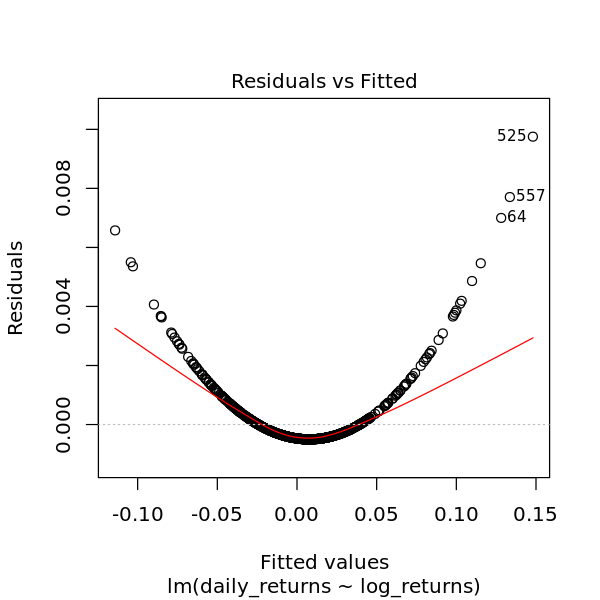

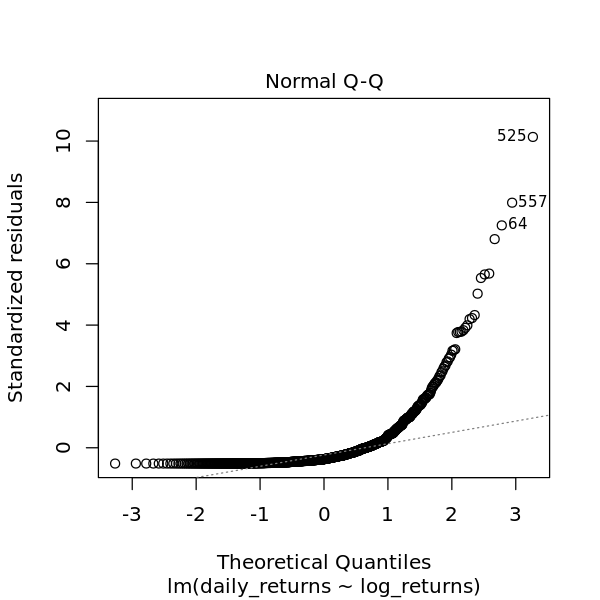

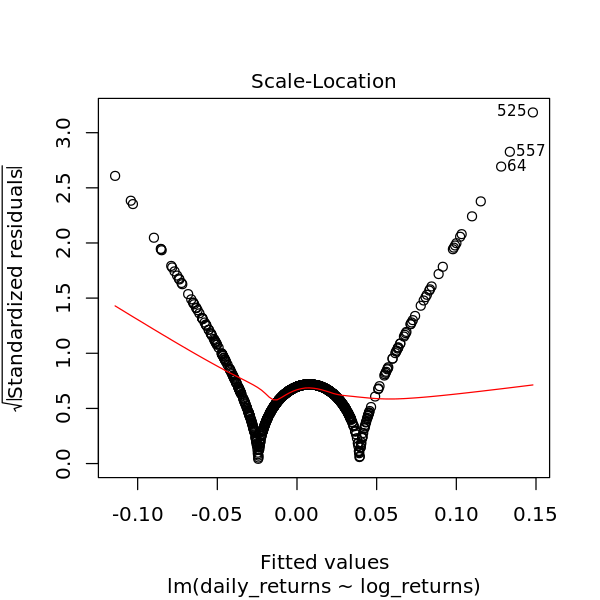

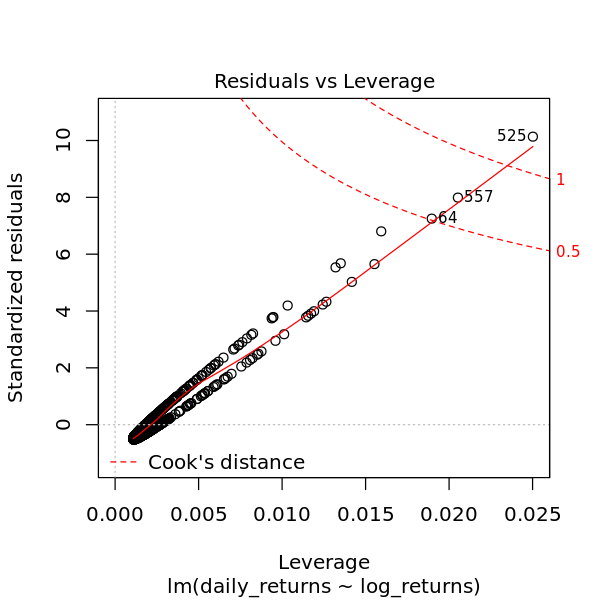

In [39]:
plot(lm.out)